In [75]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from scout.niche import randomly_sample
from scout.cyto import profiles_to_features
from scout import utils

Load UMAP model and analysis dataframe

In [76]:
working_dir = '/data/datasets/organoid_phenotyping/analysis/zika_vs_mock'
os.listdir(working_dir)

['example_roi_Artifacts.pdf',
 'example_roi_Adjacent.pdf',
 'example_roi_Surface-DN.pdf',
 'cyto_zika_umap.pdf',
 'example_roi_DN.pdf',
 'cyto_profiles_combined.npy',
 'Zika',
 'average_profile_DN.pdf',
 'analysis.csv',
 'cyto_clusters_umap.pdf',
 'average_profile_Artifacts.pdf',
 'volcano_plot_zika.pdf',
 'average_profile_Surface-DN.pdf',
 'model_zikv.umap',
 'cyto_profiles_combined_samples.npy',
 'clustermap_zika_hits.pdf',
 'example_roi_Surface-TBR1.pdf',
 'Zika_mock',
 'cyto_labels_combined.npy',
 'average_profile_Surface-TBR1.pdf',
 'zikv_with_FC.xlsx',
 'average_profile_Adjacent.pdf',
 'combined_features.xlsx']

In [80]:
umap = joblib.load(os.path.join(working_dir, 'model_zikv.umap'))
analysis = pd.read_csv(os.path.join(working_dir, 'analysis.csv'), index_col=0)
analysis.head()

,type
path,
20190625_14_48_13_AA_ef24-zika1_488LP15_561LP140_642LP50,Zika
20190625_15_22_42_AA_ef24-zika2_488LP20_561LP140_642LP50,Zika
20190625_16_04_10_AA_ef24-zika3_488LP18_561LP140_642LP50,Zika
20190625_16_22_54_AA_ef24-zika4_488LP18_561LP140_642LP50,Zika
20190625_16_31_09_AA_ef24-zika5_488LP14_561LP140_642LP50,Zika


Get all profiles and labels

In [78]:
n = 1000

np.random.seed(1)
dfs = []
for org in tqdm(analysis.index, total=len(analysis)):
    folder = analysis['type'].loc[org]
    org_dir = os.path.join(working_dir, folder, org)
    profiles = np.load(os.path.join(org_dir, 'dataset/cyto_profiles.npy'))
    labels = np.load(os.path.join(org_dir, 'cyto_labels.npy'))
    profiles_sample, labels_sample = randomly_sample(n, profiles, labels)
    x = umap.transform(profiles_sample.reshape((len(profiles_sample), -1)))
    df = pd.DataFrame({'x': x[:, 0], 
                       'y': x[:, 1],
                       'label': labels_sample,
                       'organoid': len(x) * [org], 
                       'type': len(x) * [folder]})
    dfs.append(df)
df = pd.concat(dfs)
df.head()

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../.conda/envs/scout/lib/python3.6/site-packages/umap/nndescent.py", line 124:
    @numba.njit(parallel=True)
    def init_from_random(n_neighbors, data, query_points, heap, rng_state):
    ^

  self.func_ir.loc))
/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../.conda/envs/scout/lib/python3.6/site-packag

,x,y,label,organoid,type
0,-1.979394,-2.271698,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika
1,0.603847,-3.358761,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika
2,-2.266480,1.436442,1,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika
3,0.984134,2.425520,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika
4,-0.097663,-2.026468,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika


In [81]:
zika1_idx = np.where(['zika1' in org for org in df['organoid']])[0]
zika5_idx = np.where(['zika5' in org for org in df['organoid']])[0]
mock1_idx = np.where(['ctrl1' in org for org in df['organoid']])[0]
mock5_idx = np.where(['ctrl5' in org for org in df['organoid']])[0]

df['type'].iloc[zika1_idx] = 'Zika_mock'
df['type'].iloc[zika5_idx] = 'Zika_mock'

df['type'].iloc[mock1_idx] = 'Zika'
df['type'].iloc[mock5_idx] = 'Zika'

df

/home/jswaney/.conda/envs/scout/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,x,y,label,organoid,type
0,-1.979394,-2.271698,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
1,0.603847,-3.358761,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
2,-2.266480,1.436442,1,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
3,0.984134,2.425520,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
4,-0.097663,-2.026468,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
5,0.246569,1.802785,4,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
6,1.478254,-5.411873,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
7,-3.840669,-4.894622,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
8,3.021414,-3.190261,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock
9,3.204882,-2.503851,4,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock


In [82]:
cyto_names = np.asarray(utils.read_csv(os.path.join(working_dir, 'Zika', df['organoid'].iloc[0], 'cyto_names.csv')))
cyto_names

array(['Surface-TBR1', 'Surface-DN', 'DN', 'Artifacts', 'Adjacent'],
      dtype='<U12')

In [83]:
df['cyto'] = cyto_names[df['label']]
df.head()

,x,y,label,organoid,type,cyto
0,-1.979394,-2.271698,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock,DN
1,0.603847,-3.358761,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock,DN
2,-2.266480,1.436442,1,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock,Surface-DN
3,0.984134,2.425520,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock,DN
4,-0.097663,-2.026468,2,20190625_14_48_13_AA_ef24-zika1_488LP15_561LP1...,Zika_mock,DN


In [84]:
n_samples = 5000
df_mock = df.where(df['type'] == 'Zika_mock').dropna().sample(n_samples)
df_zika = df.where(df['type'] == 'Zika').dropna().sample(n_samples)
df2 = pd.concat([df_mock, df_zika])

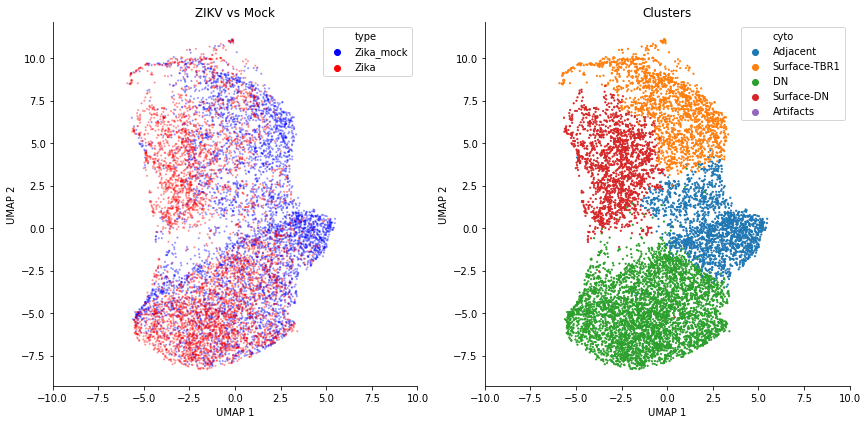

In [85]:
n_orgs = 4

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='x', y='y', hue='type', data=df2, edgecolor=None, s=2, alpha=0.3, palette=['b', 'r'])
plt.title('ZIKV vs Mock')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.xlim([-10 , 10])

plt.subplot(1, 2, 2)
sns.scatterplot(x='x', y='y', hue='cyto', data=df2, edgecolor=None, s=2)
plt.title('Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

# plt.subplot(3, 1, 3)
# sns.scatterplot(x='x', y='y', hue='organoid', data=df.where(df['type'] == 'Lancaster_d60').dropna().iloc[2*n:(n_orgs+2)*n], 
#                 edgecolor=None, s=3, alpha=1, legend=None)
# plt.title('Lancaster d60')
# plt.xlabel('UMAP 1')
# plt.ylabel('UMAP 2')

plt.tight_layout()
sns.despine()
plt.xlim([-10 , 10])
plt.savefig(os.path.join(working_dir, 'umap_zika_vs_mock.pdf'), bbox_inches='tight')
plt.show()